In [3]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from time import time
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer,TfidfTransformer)
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('dataset.csv')
print(df.info())
print(df.describe())
m1 = int(11060*98/100) - 1
print(m1)
train=df[0:m1]
test=df[m1:]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB
None
       release_year
count  11059.000000
mean    2014.209603
std        8.959517
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
10837


In [4]:
print(df.isna().sum()/len(df))

type            0.000000
title           0.000000
cast            0.123429
country         0.243693
release_year    0.000000
listed_in       0.000000
description     0.000000
dtype: float64


In [5]:
df['cast'] = df['cast'].fillna(df['cast'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
print(df.isna().sum()/len(df))

type            0.0
title           0.0
cast            0.0
country         0.0
release_year    0.0
listed_in       0.0
description     0.0
dtype: float64


In [6]:
vectorizer = CountVectorizer(analyzer='word', 
                              token_pattern=r'\b[a-zA-Z]{3,}\b',  
                              ngram_range=(1, 1) 
                              )  
count_vectorized1 = vectorizer.fit_transform(df['description'])
tfidf_transformer1 = TfidfTransformer(smooth_idf=True, use_idf=True)
vectorized1 = tfidf_transformer1.fit_transform(count_vectorized1)
des=pd.DataFrame(vectorized1.toarray(), 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(df['description']))],
             columns=vectorizer.get_feature_names())
#print(des)
count_vectorized2 = vectorizer.fit_transform(df['cast'])
tfidf_transformer2 = TfidfTransformer(smooth_idf=True, use_idf=True)
vectorized2 = tfidf_transformer2.fit_transform(count_vectorized2)
cas=pd.DataFrame(vectorized2.toarray(), 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(df['cast']))],
             columns=vectorizer.get_feature_names())
#print(cas)
count_vectorized3 = vectorizer.fit_transform(df['title'])
tfidf_transformer3 = TfidfTransformer(smooth_idf=True, use_idf=True)
vectorized3 = tfidf_transformer3.fit_transform(count_vectorized3)
ti=pd.DataFrame(vectorized3.toarray(), 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(df['title']))],
             columns=vectorizer.get_feature_names())
#print(ti)



C:\Users\mohammad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
%%capture --no-display
x  = df.description
y = df.type
cons = dict(zip(vectorizer.get_feature_names(),
               mutual_info_classif(vectorized1, y, discrete_features=True)
               ))

In [8]:
print(cons)

{'aadha': 7.309590418463007e-05, 'aadu': 5.334325446492338e-05, 'aagey': 0.00010669308274483913, 'aahe': 0.0001462019838786952, 'aaj': 5.334325446492338e-05, 'aajcha': 7.309590418463007e-05, 'aakhri': 0.0003595490214414194, 'aalorukkam': 7.309590418463007e-05, 'aamir': 5.334325446492338e-05, 'aana': 5.334325446492338e-05, 'aane': 5.334325446492338e-05, 'aankh': 5.334325446492338e-05, 'aap': 0.001700115203117527, 'aapke': 7.309590418463007e-05, 'aapla': 5.334325446492338e-05, 'aarah': 0.0003398370376959119, 'aarakshan': 7.309590418463007e-05, 'aarambh': 5.334325446492338e-05, 'aardman': 0.0001462019838786954, 'aaron': 0.00045239601901474766, 'aashayein': 0.00012643098139029484, 'aashik': 7.309590418463007e-05, 'aata': 0.00027263696255310486, 'aaviri': 0.0002193182420735803, 'aayiram': 0.0001462019838786952, 'abba': 5.334325446492338e-05, 'abbey': 5.334325446492338e-05, 'abby': 0.0002667820271872273, 'abc': 0.0012051159263785473, 'abcd': 5.334325446492338e-05, 'abdo': 5.334325446492338e-

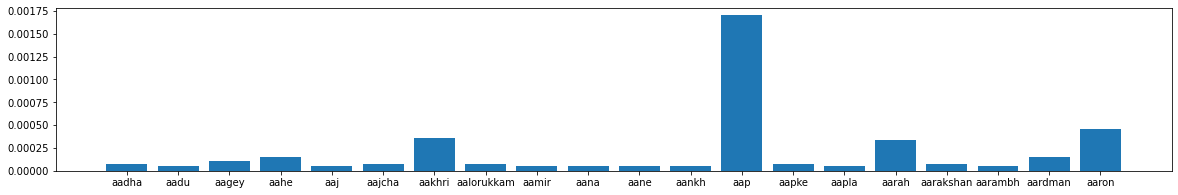

In [9]:
outp=dict(itertools.islice(cons.items(), 20))
plt.figure(figsize=(20, 3))
plt.bar(range(len(outp)), list(outp.values()), align='center' )
plt.xticks(range(len(outp)), list(outp.keys()))
plt.show()

[Text(287.91435989236334, 215.65770491803278, 'X[18299] <= 0.028\ngini = 0.491\nsamples = 10837\nvalue = [6131, 4706]'),
 Text(249.21685056819365, 212.09311475409837, 'X[747] <= 0.063\ngini = 0.481\nsamples = 10125\nvalue = [6046, 4079]'),
 Text(198.6226024704403, 208.52852459016393, 'X[9488] <= 0.074\ngini = 0.455\nsamples = 7944\nvalue = [5165, 2779]'),
 Text(161.51801242854256, 204.9639344262295, 'X[20625] <= 0.061\ngini = 0.48\nsamples = 5782\nvalue = [3462, 2320]'),
 Text(134.5180689512014, 201.39934426229507, 'X[22515] <= 0.092\ngini = 0.453\nsamples = 3938\nvalue = [2573, 1365]'),
 Text(129.57170853781304, 197.83475409836066, 'X[5879] <= 0.139\ngini = 0.47\nsamples = 3315\nvalue = [2065, 1250]'),
 Text(126.61870393558905, 194.27016393442622, 'X[303] <= 0.04\ngini = 0.475\nsamples = 3199\nvalue = [1954, 1245]'),
 Text(124.23762995631074, 190.7055737704918, 'X[5883] <= 0.059\ngini = 0.472\nsamples = 3156\nvalue = [1951, 1205]'),
 Text(123.65014075211579, 187.14098360655737, 'X[186

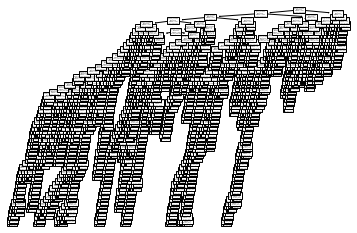

In [42]:
x = des[0:m1]
y = train.type
dtc = tree.DecisionTreeClassifier(random_state=0, max_depth=60,min_samples_leaf=1)
dtc = dtc.fit(x, y)
tree.plot_tree(dtc)

In [44]:
predicted_val=dtc.predict(des[m1:])
sum=0
for i in range(len(test)):
    if test.iloc[i]['type']==predicted_val[i]:
        sum+=1
print("Accuracy is : ",sum/len(test))

Accuracy is :  0.6936936936936937


In [39]:
predicted_val=dtc.predict(des)
sum=0
for i in range(len(train)):
    if train.iloc[i]['type']==predicted_val[i]:
        sum+=1
print("Accuracy is: ",sum/len(train))


Accuracy is:  0.9759158438682292


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
x = des[0:m1]
y = train.type
rfc=RandomForestClassifier(n_estimators=2 , max_depth = 7)
rfc.fit(x, y)

RandomForestClassifier(max_depth=7, n_estimators=2)

In [45]:
predicted_val=rfc.predict(des[m1:])
sum=0
for i in range(len(test)):
    if train.iloc[i]['type']==predicted_val[i]:
        sum+=1
print("Accuracy is: ",sum/len(test))

Accuracy is:  0.6576576576576577


In [46]:
predicted_val=rfc.predict(des)
sum=0
for i in range(len(train)):
    if train.iloc[i]['type']==predicted_val[i]:
        sum+=1
print("Accuracy is: ",sum/len(train))

Accuracy is:  0.5937067454092461


CA4   <br>
Mohammad Araghi                810198436<br>
<br>
In this assignment we will use machine learning algorithms on our dataset to <br>
train our model based on our features so we can predict new dataset's behavior<br>
based on what we learned . <br>
P1<br>
1) How can we replace NaN values?<br>
In this assignment I replaced our nan values with the most repeated value<br>
in our dataset . This way we will make data closer to average . <br>
We could use other ways like erasing rows with Nan value which will make<br>
us lose data , or we could replace our data with average (in this dataset<br>
the value of middle of our wordcount array) , which each has someother<br>
advantages and disadvantages .<br>

2) Why do we use use standardization and Normalization ?
We use standardization and Normalization to make all of our data to <br>
a standard form and make it easier to work with it .<br>
<br>
normalization:<br>
Changing our values to a range by normalization formula .<br>
In the simplest cases, normalization of ratings means adjusting values measured <br>
on different scales to a notionally common scale, often prior to averaging. <br>
In more complicated cases, normalization may refer to more sophisticated adjustments <br>
where the intention is to bring the entire probability distributions of adjusted values into alignment.<br>
<br>
standardization:<br>
Data standardization is the process of bringing data into a uniform format <br>
that allows analysts and others to research, analyze, and utilize the data. <br>
In statistics, standardization refers to the process of putting different variables <br>
on the same scale in order to compare scores between different types of variables.<br>
<br>
3)Encoding methods :<br>
One Hot Encoding:<br>
Here, we map each category to a vector that contains 1 and 0 denoting the <br>
presence of the feature or not. The number of vectors depends on the categories<br>
which we have in our dataset. For high cardinality features, this method<br>
produces a lot of columns that slows down the learning of the model significantly.<br>
<br>
Binary Encoding<br>
First, the categories are encoded as ordinal, then those <br>
integers are converted into binary code, then the digits from that <br>
binary string are split into separate columns.<br>
<br>
4)Using series values:<br>
We can split series values used in listed_in column , <br>
and use each value as a feature (each value shows a genre) .<br>
--------------<br>
Tf_idf considers both word numbers and word repeats in our dataset ,<br>
and as We can see in our output it gives us better results. <br>
We could expect that since words that are reapeated a lot in most of<br>
our values doesn't give us much info . <br>
concluding more properties will help our model work better ,<br>
and can lead to a better prediction . <br>
More information are given in our code .<br>
-------------<br>
This plot will give us some info based on our count vectorizer<br>
so we can see what words are more repeated and we can see our relation <br>
between our values . <br>
This will help us see our decisions that we make in decision tree too .<br>
<br>
P2<br>
<br>
There are some values for max_depth and min_samples_split that will<br>
lead to better predictions . We can find this values by using <br>
sklearn best_params to find best hyper parameters using cross validation<br>
proccess and then find best accuracy .<br>
-------------<br>
Using more of our model to train our model will help us with more<br>
seen data and can help us for a better predict sometimes , but it will also <br>
make our model dependent to train set and might be not good for various test sets . <br>
in this dataset it will help us more in our prediction . <br>
So I used 98% for my percentage . <br>
By decreasing train percentage we will have less accuracy and a worse prediction .<br>
while using 40% for our train set , underfitting will occur and we will get worse result<br>
By makeing max_depth very little underfitting will happen , and by making it very big<br>
overfitting will happen and our model can't give good predictions while seeing new datasets.<br>
<br>
P3<br>
<br>
In random forest classifier we give each part of our dataset to get analyses <br>
by a diffrent decision tree , and then our decision trees will vote and give <br>
a prediction finally based on all decisions .<br>
Getting a better or worse prediction is based on our trees in forest , our dataset<br>
and our max_depth . <br>
In this case we will get a worse accuracy but almost close to our first accuracy value .<br>
Bias:<br>
Bias is the difference between the average prediction of our model and the correct value <br>
which we are trying to predict. Model with high bias pays very little attention to the training data <br>
and oversimplifies the model. It always leads to high error on training and test data.<br>
Variance:<br>
Variance is the variability of model prediction for a given data point or a value which <br>
tells us spread of our data. Model with high variance pays a lot of attention to training <br>
data and does not generalize on the data which it hasn’t seen before. As a result, <br>
such models perform very well on training data but has high error rates on test data.<br>
<br>
In Random Forests the bias of the full model is equivalent to the bias of a <br>
single decision tree (which itself has high variance). By creating many of these trees,<br>
in effect a "forest", and then averaging them the variance of the final model<br>
can be greatly reduced over that of a single tree.<br>

In [1]:
import os

os.system('jupyter nbconvert --to html ai_ca4.ipynb --output out1')

0